**Uso de la librería Pytorch**

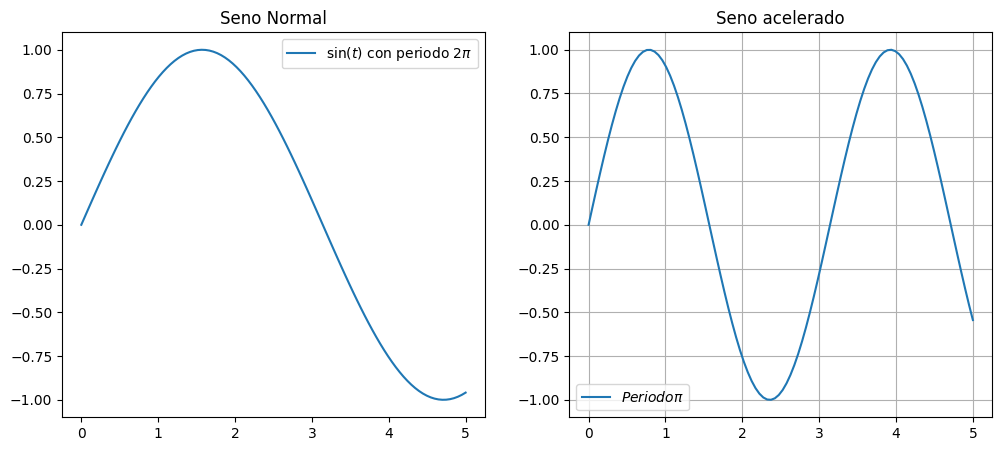

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

t=np.linspace(0,5,100)
fig,ax=plt.subplots(1,2,figsize=(12,5))
a,b=ax[0],ax[1]
a.plot(t, np.sin(t), label=r"$\sin(t)$ con periodo $2\pi$")
b.plot(t,np.sin(2*t),label=r"Periodo $\pi$")
a.set_title("Seno Normal")
b.set_title("Seno acelerado")
a.legend(loc="best")
b.legend(loc="best")
plt.grid()
plt.show()

In [15]:
import torch
import torch.nn as nn

# 1. DATOS: Creamos ejemplos para que la IA aprenda (X: entrada, Y: salida esperada)
# Usamos tensores, que son los "arrays" de PyTorch
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]], dtype=torch.float32)

# 2. MODELO: Una neurona simple (Linear) que recibe 1 dato y da 1 respuesta
modelo = nn.Linear(in_features=1, out_features=1)

# 3. CONFIGURACIÓN: ¿Cómo medimos el error y cómo mejoramos?
medidor_error = nn.MSELoss() # Mide qué tan lejos estamos del resultado real
optimizador = torch.optim.SGD(modelo.parameters(), lr=0.01) # El "entrenador" que ajusta los pesos

# 4. ENTRENAMIENTO: Repetimos el proceso 100 veces
for epoca in range(100):
    # Paso A: La IA hace una predicción
    prediccion = modelo(X)
    
    # Paso B: Calculamos qué tan mal lo hizo (el error)
    error = medidor_error(prediccion, Y)
    
    # Paso C: PyTorch calcula automáticamente cómo mejorar (Backpropagation)
    error.backward()
    
    # Paso D: El optimizador ajusta la neurona y borra los cálculos viejos
    optimizador.step()
    optimizador.zero_grad()

# 5. PRUEBA: Vamos a pedirle que calcule 2 * 10
resultado = modelo(torch.tensor([10.0]))
print(f"La IA dice que 2 * 10 es aproximadamente: {resultado.item():.2f}")

La IA dice que 2 * 10 es aproximadamente: 18.10
